In [1]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import matplotlib
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_control_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/*") #End of year control
data_control_last18=data_control_path[24:240] # Get years 3-20
data_control_data = xr.open_mfdataset(data_control_last18,combine="by_coords",use_cftime=True)
data_control = data_control_data.mean('time') # Average over the last 18 years


data_00_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam_00_w100/CESM_output_data/atm/hist/*")
data_00_last18=data_00_path[24:240] # Get years 3-20
data_00_data = xr.open_mfdataset(data_00_last18,combine="by_coords",use_cftime=True)
data_00 = data_00_data.mean('time') # Average over the last 18 years


data_25_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam_25_n_w100/CESM_output_data/atm/hist/*")
data_25_last18=data_25_path[24:240] # Get years 3-20
data_25_data = xr.open_mfdataset(data_25_last18,combine="by_coords",use_cftime=True)
data_25_n = data_25_data.mean('time') # Average over the last 18 years

data_50_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_50_n_w100/CESM_output_data/atm/hist/*")
data_50_last18=data_50_path[24:240] # Get years 3-20
data_50_data = xr.open_mfdataset(data_50_last18,combine="by_coords",use_cftime=True)
data_50_n = data_50_data.mean('time') # Average over the last 18 years

data_75_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_75_n_w100/CESM_output_data/atm/hist/*")
data_75_last18=data_75_path[24:240] # Get years 3-20
data_75_data = xr.open_mfdataset(data_75_last18,combine="by_coords",use_cftime=True)
data_75_n = data_75_data.mean('time') # Average over the last 18 years

data_100_path=glob.glob("/data/keeling/a/mailes2/a/CESM_DATA/wide_100/outputdata/atm/hist/*")
data_100_last18=data_100_path[24:240] # Get years 3-20
data_100_data = xr.open_mfdataset(data_100_last18,combine="by_coords",use_cftime=True)
data_100_n = data_100_data.mean('time') # Average over the last 18 years

data_125_path=glob.glob("/data/keeling/a/mailes2/a/CESM_DATA/wide_125/outputdata/atm/hist/*")
data_125_last18=data_125_path[24:240] # Get years 3-20
data_125_data = xr.open_mfdataset(data_125_last18,combine="by_coords",use_cftime=True)
data_125_n = data_125_data.mean('time') # Average over the last 18 years

In [3]:
data_list = [ data_75_n, data_50_n,  data_25_n, data_00]

In [4]:
# Weights

weights = np.cos(np.deg2rad(data_control.lat))
weights.name='weights'
weights

<xarray.DataArray 'weights' (lat: 96)>
array([6.12323400e-17, 3.30633693e-02, 6.60905843e-02, 9.90455303e-02,
       1.31892171e-01, 1.64594590e-01, 1.97117027e-01, 2.29423920e-01,
       2.61479941e-01, 2.93250037e-01, 3.24699469e-01, 3.55793847e-01,
       3.86499169e-01, 4.16781860e-01, 4.46608807e-01, 4.75947393e-01,
       5.04765538e-01, 5.33031729e-01, 5.60715057e-01, 5.87785252e-01,
       6.14212713e-01, 6.39968541e-01, 6.65024572e-01, 6.89353409e-01,
       7.12928448e-01, 7.35723911e-01, 7.57714870e-01, 7.78877279e-01,
       7.99187997e-01, 8.18624815e-01, 8.37166478e-01, 8.54792713e-01,
       8.71484244e-01, 8.87222819e-01, 9.01991230e-01, 9.15773327e-01,
       9.28554038e-01, 9.40319390e-01, 9.51056516e-01, 9.60753676e-01,
       9.69400266e-01, 9.76986831e-01, 9.83505075e-01, 9.88947871e-01,
       9.93309266e-01, 9.96584493e-01, 9.98769969e-01, 9.99863305e-01,
       9.99863305e-01, 9.98769969e-01, 9.96584493e-01, 9.93309266e-01,
       9.88947871e-01, 9.83505075e-01, 9.76986831e-01, 9.69400266e-01,
       9.60753676e-01, 9.51056516e-01, 9.40319390e-01, 9.28554038e-01,
       9.15773327e-01, 9.01991230e-01, 8.87222819e-01, 8.71484244e-01,
       8.54792713e-01, 8.37166478e-01, 8.18624815e-01, 7.99187997e-01,
       7.78877279e-01, 7.57714870e-01, 7.35723911e-01, 7.12928448e-01,
       6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 6.12323400e-17])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [5]:
test = data_control.FSNT.weighted(weights).mean(('lat','lon'))
test

<xarray.DataArray 'FSNT' ()>
dask.array<truediv, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [6]:
# All Sky

#Control
control_Rw = data_control.FSNT.mean('lon') - data_control.FLNT.mean('lon')
control_Rw.load()

toa_00 = data_00.FSNT.mean('lon') - data_00.FLNT.mean('lon') - control_Rw
toa_00.load()


toa_25_n = data_25_n.FSNT.mean('lon') - data_25_n.FLNT.mean('lon') - control_Rw
toa_25_s = toa_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
toa_25_n.load()
toa_25_s.load()



toa_50_n = data_50_n.FSNT.mean('lon') - data_50_n.FLNT.mean('lon') - control_Rw
toa_50_s = toa_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
toa_50_n.load()
toa_50_s.load()


toa_75_n = data_75_n.FSNT.mean('lon') - data_75_n.FLNT.mean('lon') - control_Rw
toa_75_s = toa_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
toa_75_n.load()
toa_75_s.load()

toa_100_n = data_100_n.FSNT.mean('lon') - data_100_n.FLNT.mean('lon') - control_Rw
toa_100_s = toa_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
toa_100_n.load()
toa_100_s.load()

toa_125_n = data_125_n.FSNT.mean('lon') - data_125_n.FLNT.mean('lon') - control_Rw
toa_125_s = toa_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))
toa_125_n.load()
toa_125_s.load()

<xarray.DataArray (lat: 96)>
array([ 0.2306366 ,  0.18223572,  0.18432617,  0.18630981,  0.14923096,
        0.14009094,  0.11968994,  0.129776  ,  0.10075378,  0.09333038,
        0.0671463 ,  0.0256424 , -0.01690674, -0.05619049, -0.04049683,
       -0.03582764, -0.0320282 , -0.05615234, -0.0682373 , -0.09184265,
       -0.11367798, -0.16169739, -0.20578003, -0.23118591, -0.23469543,
       -0.04135132,  0.08123779,  0.11560059,  0.16471863,  0.26591492,
        0.33088684,  0.28489685,  0.31567383,  0.19296265,  0.3121643 ,
        0.3427124 ,  0.30874634,  0.31002808,  0.29556274,  0.16848755,
        0.21481323,  0.19116211,  0.18719482,  0.16668701,  0.10281372,
        0.10441589,  0.11482239,  0.09382629,  0.30229187,  0.19424438,
        0.06462097,  0.05239868, -0.05084229, -0.04360962, -0.0083313 ,
        0.10653687,  0.2487793 ,  0.36584473,  0.3912964 ,  0.46359253,
        0.30882263,  0.284729  ,  0.220932  ,  0.31474304,  0.06425476,
        0.24720764,  0.26365662,  0.09286499, -0.12712097, -0.25172424,
       -0.1353302 , -0.09599304, -0.11663818, -0.05392456, -0.010849  ,
        0.08392334,  0.15356445,  0.12731934,  0.10127258,  0.11779785,
        0.10684204,  0.0670166 ,  0.06726837,  0.03791046,  0.01365662,
        0.03662872, -0.0085907 , -0.03328705, -0.11367798, -0.19186401,
       -0.24369812, -0.25941467, -0.25123596, -0.18878174, -0.07249451,
        0.33547974], dtype=float32)
Coordinates:
  * lat      (lat) float64 90.0 88.11 86.21 84.32 ... -84.32 -86.21 -88.11 -90.0

In [7]:
x_dim_mesh = np.linspace(0,1,96)
xdim_00, toamesh_00 = np.meshgrid(x_dim_mesh, toa_00)

xdim_25_n, toamesh_25_n = np.meshgrid(x_dim_mesh, toa_25_n)

xdim_50_n, toamesh_50_n = np.meshgrid(x_dim_mesh, toa_50_n)

xdim_75_n, toamesh_75_n = np.meshgrid(x_dim_mesh, toa_75_n)

#xdim_100_n, toamesh_100_n = np.meshgrid(x_dim_mesh, toa_100_n)
#xdim_125_n, toamesh_125_n = np.meshgrid(x_dim_mesh, toa_125_n)


xdim_25_s, toamesh_25_s = np.meshgrid(x_dim_mesh, toa_25_s)

xdim_50_s, toamesh_50_s = np.meshgrid(x_dim_mesh, toa_50_s)

xdim_75_s, toamesh_75_s = np.meshgrid(x_dim_mesh, toa_75_s)

#xdim_100_s, toamesh_100_s = np.meshgrid(x_dim_mesh, toa_100_s)
#xdim_125_s, toamesh_125_s = np.meshgrid(x_dim_mesh, toa_125_s)


In [8]:
xdim_toa = [ xdim_75_s, xdim_50_s,xdim_25_s, xdim_00,
            xdim_25_n,  xdim_50_n, xdim_75_n]

mesh_toa = [ toamesh_75_s,toamesh_50_s, toamesh_25_s, toamesh_00,  toamesh_25_n,
             toamesh_50_n,  toamesh_75_n]

In [9]:
mean_toa_00 = toa_00.weighted(weights).mean('lat')

mean_toa_25_n = toa_25_n.weighted(weights).mean('lat')

mean_toa_50_n = toa_50_n.weighted(weights).mean('lat')

mean_toa_75_n = toa_75_n.weighted(weights).mean('lat')

#mean_toa_100_n = toa_100_n.weighted(weights).mean('lat')
#mean_toa_125_n = toa_125_n.weighted(weights).mean('lat')


mean_toa_25_s = toa_25_s.weighted(weights).mean('lat')

mean_toa_50_s = toa_50_s.weighted(weights).mean('lat')

mean_toa_75_s = toa_75_s.weighted(weights).mean('lat')
#mean_toa_100_s = toa_100_s.weighted(weights).mean('lat')
#mean_toa_125_s = toa_125_s.weighted(weights).mean('lat')


In [10]:
mean_list_toa = [ mean_toa_75_s, mean_toa_50_s, mean_toa_25_s,
                 mean_toa_00, mean_toa_25_n, mean_toa_50_n, mean_toa_75_n]

In [11]:
# Clear Sky

#Control
control_clr = data_control.FSNTC.mean('lon') - data_control.FLNTC.mean('lon')
control_clr.load()

clr_00 = data_00.FSNTC.mean('lon') - data_00.FLNTC.mean('lon') - control_clr
clr_00.load()

clr_25_n = data_25_n.FSNTC.mean('lon') - data_25_n.FLNTC.mean('lon') - control_clr
clr_25_s = clr_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
clr_25_n.load()
clr_25_s.load()



clr_50_n = data_50_n.FSNTC.mean('lon') - data_50_n.FLNTC.mean('lon') - control_clr
clr_50_s = clr_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
clr_50_n.load()
clr_50_s.load()



clr_75_n = data_75_n.FSNTC.mean('lon') - data_75_n.FLNTC.mean('lon') - control_clr
clr_75_s = clr_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
clr_75_n.load()
clr_75_s.load()

clr_100_n = data_100_n.FSNTC.mean('lon') - data_100_n.FLNTC.mean('lon') - control_clr
clr_100_s = clr_100_n.assign_coords(lat=list(reversed(data_100_n.lat)))
clr_100_n.load()
clr_100_s.load()

clr_125_n = data_125_n.FSNTC.mean('lon') - data_125_n.FLNTC.mean('lon') - control_clr
clr_125_s = clr_125_n.assign_coords(lat=list(reversed(data_125_n.lat)))
clr_125_n.load()
clr_125_s.load()


<xarray.DataArray (lat: 96)>
array([ 1.31500244e-01,  1.23977661e-01,  1.17263794e-01,  1.20483398e-01,
        1.19430542e-01,  1.18255615e-01,  1.17843628e-01,  1.14105225e-01,
        1.00662231e-01,  9.26361084e-02,  8.73489380e-02,  7.39059448e-02,
        5.62133789e-02,  3.92303467e-02,  2.50701904e-02,  4.42504883e-04,
       -2.30865479e-02, -2.93121338e-02, -2.46582031e-02, -2.06909180e-02,
       -2.57263184e-02, -2.69775391e-02, -1.68304443e-02, -1.73950195e-03,
        8.02612305e-03,  1.03149414e-02,  1.33361816e-02,  2.15454102e-02,
        2.32238770e-02,  2.33764648e-02,  1.65252686e-02,  3.02124023e-03,
       -2.80761719e-03,  1.19934082e-02,  4.02526855e-02,  7.20520020e-02,
        1.01562500e-01,  1.09985352e-01,  9.61303711e-02,  7.06787109e-02,
        4.04052734e-02,  7.84301758e-03, -5.06286621e-02, -1.14715576e-01,
       -1.65649414e-01, -1.65313721e-01, -1.13861084e-01, -5.20019531e-02,
        2.82287598e-02,  5.96008301e-02,  1.72119141e-02, -4.30297852e-03,
        8.02612305e-03,  2.20336914e-02,  4.63256836e-02,  7.70263672e-02,
        1.00830078e-01,  1.10748291e-01,  1.03240967e-01,  7.82165527e-02,
        4.64782715e-02,  2.45056152e-02,  1.34277344e-02,  8.34655762e-03,
        1.34277344e-02,  1.35498047e-02,  1.28021240e-02,  1.29852295e-02,
        2.63366699e-02,  3.79486084e-02,  3.41796875e-02,  2.20336914e-02,
        1.72424316e-02,  3.10363770e-02,  4.41894531e-02,  3.14483643e-02,
        4.47082520e-03, -1.10473633e-02, -2.25372314e-02, -3.48510742e-02,
       -4.59747314e-02, -5.40618896e-02, -6.18896484e-02, -7.38067627e-02,
       -8.00857544e-02, -9.14001465e-02, -1.00067139e-01, -1.06613159e-01,
       -1.30599976e-01, -1.73049927e-01, -2.41546631e-01, -3.34213257e-01,
       -4.46731567e-01, -5.78002930e-01, -7.32971191e-01, -9.08386230e-01],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 90.0 88.11 86.21 84.32 ... -84.32 -86.21 -88.11 -90.0

In [12]:
xdimclr_00, clrmesh_00 = np.meshgrid(x_dim_mesh, clr_00)

xdimclr_25_n, clrmesh_25_n = np.meshgrid(x_dim_mesh, clr_25_n)

xdimclr_50_n, clrmesh_50_n = np.meshgrid(x_dim_mesh, clr_50_n)

xdimclr_75_n, clrmesh_75_n = np.meshgrid(x_dim_mesh, clr_75_n)
#xdimclr_100_n, clrmesh_100_n = np.meshgrid(x_dim_mesh, clr_100_n)
#xdimclr_125_n, clrmesh_125_n = np.meshgrid(x_dim_mesh, clr_125_n)


xdimclr_25_s, clrmesh_25_s = np.meshgrid(x_dim_mesh, clr_25_s)

xdimclr_50_s, clrmesh_50_s = np.meshgrid(x_dim_mesh, clr_50_s)

xdimclr_75_s, clrmesh_75_s = np.meshgrid(x_dim_mesh, clr_75_s)
#xdimclr_100_s, clrmesh_100_s = np.meshgrid(x_dim_mesh, clr_100_s)
#xdimclr_125_s, clrmesh_125_s = np.meshgrid(x_dim_mesh, clr_125_s)

xdimclr = [xdimclr_75_s, xdimclr_50_s,  xdimclr_25_s, xdimclr_00,  xdimclr_25_n, xdimclr_50_n,  xdimclr_75_n]

clrmesh = [ clrmesh_75_s, clrmesh_50_s, clrmesh_25_s, clrmesh_00, clrmesh_25_n,clrmesh_50_n, clrmesh_75_n]

In [13]:
mean_clr_00 = clr_00.weighted(weights).mean('lat')

mean_clr_25_n = clr_25_n.weighted(weights).mean('lat')

mean_clr_50_n = clr_50_n.weighted(weights).mean('lat')

mean_clr_75_n = clr_75_n.weighted(weights).mean('lat')
#mean_clr_100_n = clr_100_n.weighted(weights).mean('lat')
#mean_clr_125_n = clr_125_n.weighted(weights).mean('lat')


mean_clr_25_s = clr_25_s.weighted(weights).mean('lat')
mean_clr_50_s = clr_50_s.weighted(weights).mean('lat')
mean_clr_75_s = clr_75_s.weighted(weights).mean('lat')
#mean_clr_100_s = clr_100_s.weighted(weights).mean('lat')
#mean_clr_125_s = clr_125_s.weighted(weights).mean('lat')


In [14]:
mean_list_clr = [ mean_clr_75_s,mean_clr_50_s, mean_clr_25_s,
                 mean_clr_00, mean_clr_25_n,  mean_clr_50_n,  mean_clr_75_n]

In [15]:
cre_00 = toa_00 - clr_00

cre_25_n = toa_25_n - clr_25_n

cre_50_n = toa_50_n - clr_50_n

cre_75_n = toa_75_n - clr_75_n
cre_100_n = toa_100_n - clr_100_n
cre_125_n = toa_125_n - clr_125_n


cre_25_s = toa_25_s - clr_25_s

cre_50_s = toa_50_s - clr_50_s

cre_75_s = toa_75_s - clr_75_s
cre_100_s = toa_100_s - clr_100_s
cre_125_s = toa_125_s - clr_125_s


In [16]:
xdimmesh_00, cremesh_00 = np.meshgrid(x_dim_mesh, cre_00)

xdimmesh_25_n, cremesh_25_n = np.meshgrid(x_dim_mesh, cre_25_n)

xdimmesh_50_n, cremesh_50_n = np.meshgrid(x_dim_mesh, cre_50_n)

xdimmesh_75_n, cremesh_75_n = np.meshgrid(x_dim_mesh, cre_75_n)
#xdimmesh_100_n, cremesh_100_n = np.meshgrid(x_dim_mesh, cre_100_n)
#xdimmesh_125_n, cremesh_125_n = np.meshgrid(x_dim_mesh, cre_125_n)


xdimmesh_25_s, cremesh_25_s = np.meshgrid(x_dim_mesh, cre_25_s)

xdimmesh_50_s, cremesh_50_s = np.meshgrid(x_dim_mesh, cre_50_s)

xdimmesh_75_s, cremesh_75_s = np.meshgrid(x_dim_mesh, cre_75_s)
#xdimmesh_100_s, cremesh_100_s = np.meshgrid(x_dim_mesh, cre_100_s)
#xdimmesh_125_s, cremesh_125_s = np.meshgrid(x_dim_mesh, cre_125_s)

xdim_cre = [  xdimmesh_75_s, xdimmesh_50_s,  xdimmesh_25_s,
             xdimmesh_00,xdimmesh_25_n, 
            xdimmesh_50_n, xdimmesh_75_n]

cremesh = [cremesh_75_s,cremesh_50_s,  cremesh_25_s,  cremesh_00,  cremesh_25_n,
           cremesh_50_n, cremesh_75_n]

In [17]:
mean_cre_00 = cre_00.weighted(weights).mean('lat')

mean_cre_25_n = cre_25_n.weighted(weights).mean('lat')

mean_cre_50_n = cre_50_n.weighted(weights).mean('lat')

mean_cre_75_n = cre_75_n.weighted(weights).mean('lat')
#mean_cre_100_n = cre_100_n.weighted(weights).mean('lat')
#mean_cre_125_n = cre_125_n.weighted(weights).mean('lat')


mean_cre_25_s = cre_25_s.weighted(weights).mean('lat')

mean_cre_50_s = cre_50_s.weighted(weights).mean('lat')

mean_cre_75_s = cre_75_s.weighted(weights).mean('lat')
#mean_cre_100_s = cre_100_s.weighted(weights).mean('lat')
#mean_cre_125_s = cre_125_s.weighted(weights).mean('lat')

In [18]:
mean_list_cre = [ mean_cre_75_s, mean_cre_50_s,  mean_cre_25_s,
                 mean_cre_00,  mean_cre_25_n,    mean_cre_50_n, mean_cre_75_n]

In [19]:
lats = [-75,-50,-25,0,25,50, 75]

In [20]:
latlabels = ["-75","-50","-25","0","25","50", "75"]

In [86]:
def mesh_plot(ax,xdim, toamesh, lat):
    """
    For plotting the mesh
    """
    if int(lat)>=0:
        mappable = ax.pcolormesh(xdim, np.array(data_control.coords['lat'].values), toamesh, cmap='seismic', vmin=-10, vmax=10)
    else:
        mappable = ax.pcolormesh(xdim, np.array(list(reversed(data_control.coords['lat'].values))), toamesh, cmap='seismic',
                                 vmin=-10, vmax=10)
    if lat == "-75":
        if num == 0:
            ax.set_yticks(np.arange(-90,61,30))
            ax.set_ylabel("Latitude")
        else:
            ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
    elif lat == "75":
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    if int(lat)%25==0:
        ax.set_xlabel(lat, rotation="45", fontsize=10.0, fontweight='bold')
    return mappable

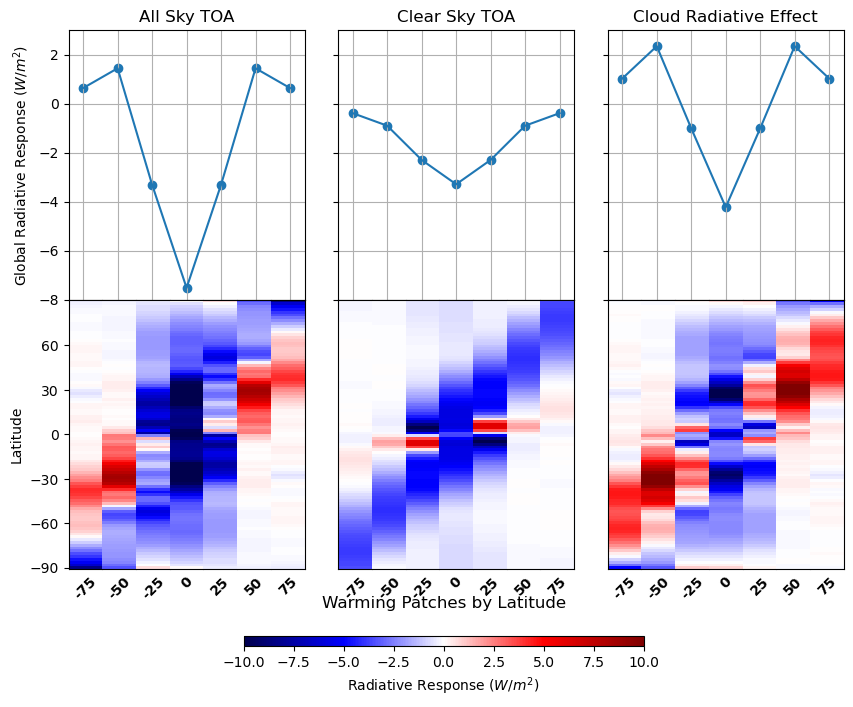

In [87]:
plt.rcParams['figure.figsize'] = [10,7]
fig = plt.figure()

gs = GridSpec(2, 23)
gs.update(wspace=0)

ytickrange = [2,0,-2,-4,-6,-8,-10,-12,-14]
ymin=-8
ymax=3

ax1 = fig.add_subplot(gs[0,:7])
ax1.scatter(lats, mean_list_toa)
ax1.plot(lats, mean_list_toa)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.set_xticks(lats, minor=False)
ax1.set_yticks(ytickrange, minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-85.5,85.5)
ax1.set_ylim(ymin,ymax)
ax1.grid(True)
ax1.set_title('All Sky TOA')
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for num in range(0,7):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])

axempty1 = fig.add_subplot(gs[0,8])
axempty1.remove()

ax2 = fig.add_subplot(gs[0,8:15])    
ax2.scatter(lats, mean_list_clr)
ax2.plot(lats, mean_list_clr)
ax2.set_xticks(lats, minor=False)
ax2.set_yticks(ytickrange, minor=False)
ax2.yaxis.grid(True, which='major')
ax2.xaxis.grid(True, which='major')
ax2.set_xlim(-85.5, 85.5)
ax2.set_ylim(ymin,ymax)
ax2.grid(True)
ax2.set_title('Clear Sky TOA')
for tick in ax2.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for num in range(8,15):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax, xdimclr[num-8], clrmesh[num-8], latlabels[num-8])
    
#axempty2 = fig.add_subplot(gs[0,16])
#axempty2.remove()

ax3 = fig.add_subplot(gs[0,16:])
ax3.scatter(lats, mean_list_cre)
ax3.plot(lats, mean_list_cre)
ax3.set_xticks(lats, minor=False)
ax3.set_yticks(ytickrange, minor=False)
ax3.yaxis.grid(True, which='major')
ax3.xaxis.grid(True, which='major')
ax3.set_xlim(-85.5, 85.5)
ax3.set_ylim(ymin,ymax)
ax3.grid(True)
ax3.set_title('Cloud Radiative Effect')
for tick in ax3.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax3.yaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
     tick.label1.set_visible(False)
     tick.label2.set_visible(False)    
    
for num in range(16,23):
    ax = fig.add_subplot(gs[1,num])
    mappable = mesh_plot(ax, xdim_cre[num-16], cremesh[num-16], latlabels[num-16])

fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()

In [48]:
lat_coords=[]
row_sum = []
control_row = data_control.FSNT.mean('lon') - data_control.FLNT.mean('lon')
control_row.load()

for lat in data_control['lat'].values:
    lat_coords.append(lat)
    average_list = []
    for dataset in data_list:
        average_list.append(dataset.FSNT.sel(lat=lat,method='nearest').mean('lon') - dataset.FLNT.sel(lat=lat,method='nearest').mean('lon') - control_row.sel(lat=lat,method='nearest'))
        if dataset is not data_00:
            average_list.append(dataset.FSNT.sel(lat=-lat,method='nearest').mean('lon') - dataset.FLNT.sel(lat=-lat,method='nearest').mean('lon') - control_row.sel(lat=-lat,method='nearest'))
    row_sum.append(sum(average_list)/len(average_list))

Text(0.5, 0, 'Radiative Response ($W/m^2$)')

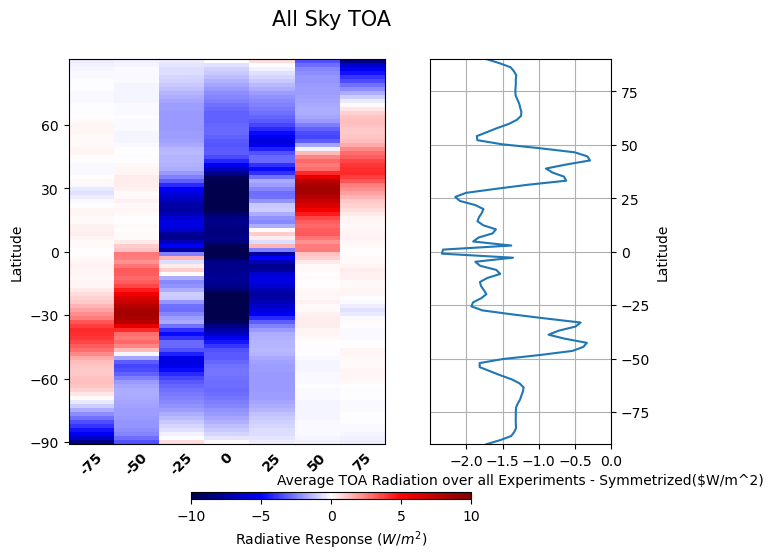

In [88]:
lat_w_negative = [-75,-50,-25,0,25,50,75]

plt.rcParams['figure.figsize'] = [7,5]
fig = plt.figure()

gs = GridSpec(1, 12)
gs.update(wspace=0)

for num in range(0,7):
    ax = fig.add_subplot(gs[0,num])
    mappable = mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])
    
ax1 = fig.add_subplot(gs[0,8:])
ax1.plot(row_sum, lat_coords)
ax1.set_ylabel('Latitude')
ax1.set_yticks(lat_w_negative, minor=False)
ax1.set_xticks([-2.0,-1.5,-1.0,-0.5,0], minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,0)
ax1.set_ylim(-90,90)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax1.set_xlabel(r'Average TOA Radiation over all Experiments - Symmetrized($W/m^2)')
ax1.grid(True)
plt.suptitle('All Sky TOA', fontsize=15.0)
# for tick in ax1.xaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
#     tick.label1.set_visible(False)
#     tick.label2.set_visible(False)
    
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')

Text(0.5, 0, 'Radiative Response ($W/m^2$)')

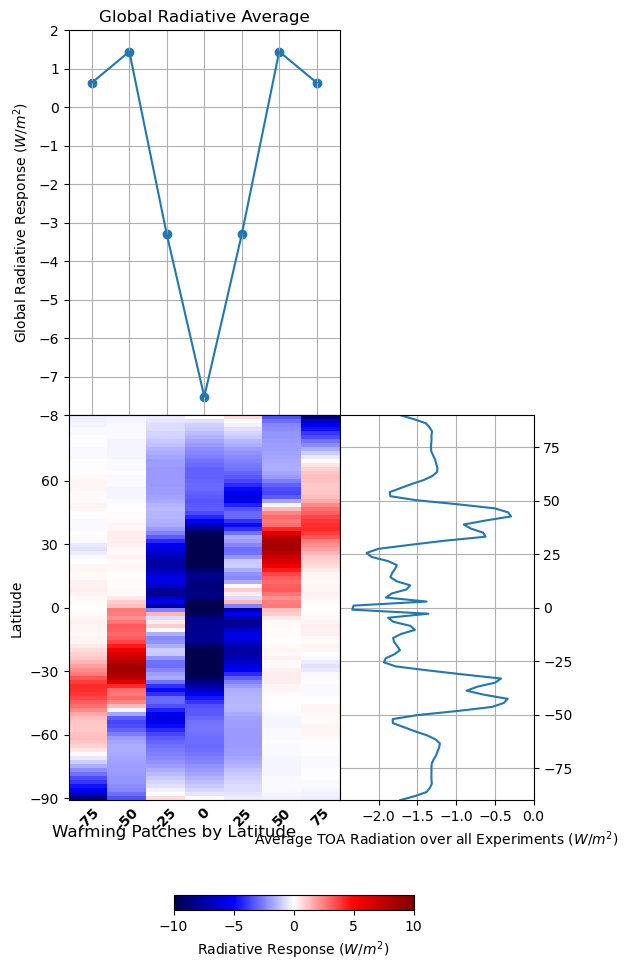

In [89]:
lat_w_negative = [-75,-50,-25,0,25,50,75]

plt.rcParams['figure.figsize'] = [6,10]
fig = plt.figure()

gs = GridSpec(2, 12)
gs.update(wspace=0)

ytickrange = [2,1,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14]
ymin=-8
ymax=2

ax1 = fig.add_subplot(gs[0,:7])
ax1.scatter(lats, mean_list_toa)
ax1.plot(lats, mean_list_toa)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.set_xticks(lats, minor=False)
ax1.set_yticks(ytickrange, minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-90.5,90.5)
ax1.set_ylim(ymin,ymax)
ax1.grid(True)
ax1.set_title('Global Radiative Average')
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for num in range(0,7):
    ax = fig.add_subplot(gs[1,num])
    mappable = mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])
    
ax1 = fig.add_subplot(gs[1,7:])
ax1.plot(row_sum, lat_coords)
#ax1.set_ylabel('Latitude')
ax1.set_yticks(lat_w_negative, minor=False)
ax1.set_xticks([-2.0,-1.5,-1.0,-0.5,0,0.5], minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,0)
ax1.set_ylim(-90,90)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax1.set_xlabel(r'Average TOA Radiation over all Experiments ($W/m^2$)')
ax1.grid(True)
#plt.suptitle('All Sky TOA', fontsize=15.0)
# for tick in ax1.xaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
#     tick.label1.set_visible(False)
#     tick.label2.set_visible(False)
    
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
fig.supxlabel('Warming Patches by Latitude', x=0.30,y=0.07)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')